In [ ]:
import kagglehub

path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

: 

In [5]:
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.3303 - loss: 2.1729 - val_accuracy: 0.8410 - val_loss: 0.4530
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8910 - loss: 0.3388 - val_accuracy: 0.9700 - val_loss: 0.1059
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9804 - loss: 0.0802 - val_accuracy: 0.9976 - val_loss: 0.0242
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9917 - loss: 0.0353 - val_accuracy: 0.9987 - val_loss: 0.0087
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9988 - loss: 0.0072 - val_accuracy: 0.9450 - val_loss: 0.1610
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9798 - loss: 0.0652 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9956 - loss: 0.0165 - val_accuracy: 0.9989 - val_loss: 0.0093
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9999 - loss: 0.0024 - val_ac

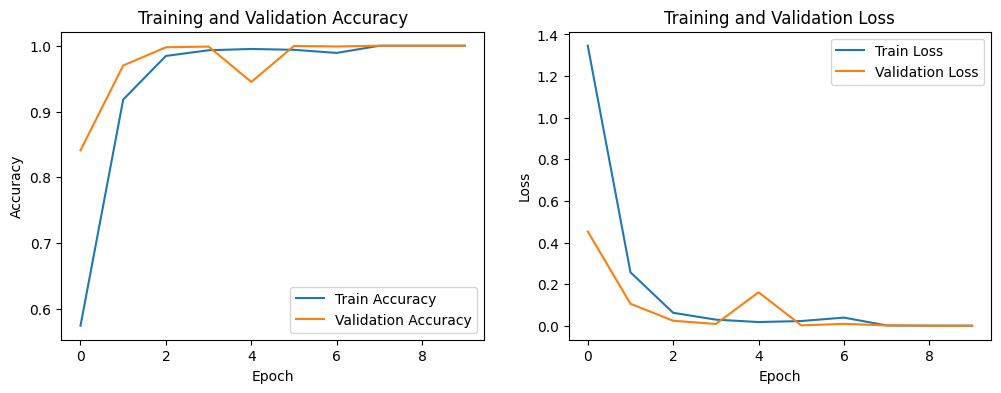

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# Path to the folder where your downloaded dataset is located
dataset_path = path  # Update this with the actual path to your dataset

# Load the dataset
train_data = pd.read_csv(os.path.join(dataset_path, 'sign_mnist_train.csv'))
test_data = pd.read_csv(os.path.join(dataset_path, 'sign_mnist_test.csv'))

# Split the data into features (X) and labels (y)
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Reshape the features into the shape expected by CNN (28x28 images)
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# Normalize pixel values (0-255) to (0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Expand dimensions for CNN input (from 28x28 to 28x28x1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert the labels into one-hot encoded vectors
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



# Build the CNN model
model = tf.keras.models.Sequential([
    # First Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the 3D output to 1D
    tf.keras.layers.Flatten(),

    # Fully connected Dense layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer (24 output nodes for A-Y, excluding J)
    tf.keras.layers.Dense(24, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Plot the training and validation accuracy/loss curves
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
#For vs code manual image upload
import cv2
import numpy as np

# Path to the input image
image_path = './images/Screenshot 2024-11-11 195825.png'  # Replace with the path to your image file

# Function to preprocess the image before prediction
def preprocess_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not load image at {image_path}")
        return None, None
    
    # Resize to 28x28 to match the input of the CNN model
    resized_image = cv2.resize(image, (28, 28))
    
    # Normalize the pixel values to range 0-1
    normalized_image = resized_image / 255.0
    
    # Reshape the image to (1, 28, 28, 1) to match the input shape for the model
    reshaped_image = np.reshape(normalized_image, (1, 28, 28, 1))
    
    return reshaped_image, image  # Return both processed and original images

# Dictionary to map the predicted labels to their corresponding alphabets
labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 
               7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 
               13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 
               19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'}

# Preprocess the image for the model
processed_image, original_image = preprocess_image(image_path)

# Check if image preprocessing was successful
if processed_image is not None:
    # Make prediction using the trained model
    predictions = model.predict(processed_image)
    predicted_label = np.argmax(predictions)

    # Get the corresponding alphabet from the prediction
    predicted_alphabet = labels_dict[predicted_label]

    # Display the result
    print(f'Predicted Sign Language Alphabet: {predicted_alphabet}')

    # Annotate and display the original image with the predicted label
    output_image = cv2.putText(original_image.copy(), f'Predicted: {predicted_alphabet}', 
                               (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the image using cv2.imshow in VS Code
    cv2.imshow("Predicted Sign Language Alphabet", output_image)
    cv2.waitKey(0)  # Wait indefinitely until a key is pressed
    cv2.destroyAllWindows()
else:
    print("Failed to load or preprocess the image. Please check the image path.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Sign Language Alphabet: B


In [ ]:
#For vs code web cam
import cv2
import numpy as np

# Function to preprocess the image frame before prediction
def preprocess_frame(frame):
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize to 28x28 to match the input of the CNN model
    resized_frame = cv2.resize(gray_frame, (28, 28))

    # Normalize the pixel values to range 0-1
    normalized_frame = resized_frame / 255.0

    # Reshape the image to (28, 28, 1) to match the input shape for the model
    reshaped_frame = np.reshape(normalized_frame, (1, 28, 28, 1))

    return reshaped_frame

# Dictionary to map the predicted labels to their corresponding alphabets
labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G',
               7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N',
               13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T',
               19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'}

# Open a connection to the webcam
cap = cv2.VideoCapture(0)

print("Press 'q' to quit.")

while True:
    # Capture frame-by-frame from the webcam
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture video")
        break

    # Preprocess the frame for the model
    processed_frame = preprocess_frame(frame)

    # Make prediction using the trained model
    predictions = model.predict(processed_frame)
    predicted_label = np.argmax(predictions)

    # Get the corresponding alphabet from the prediction
    predicted_alphabet = labels_dict[predicted_label]

    # Display the result on the video feed
    cv2.putText(frame, f'Predicted: {predicted_alphabet}', (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the video feed with the prediction
    cv2.imshow('Sign Language Recognition', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


Press 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39

In [ ]:
#For google colab

import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Path to the input image
image_path = "/content/drive/MyDrive/task5/Screenshot 2024-11-11 195757.png"  # Replace with the path to your image file

# Function to preprocess the image before prediction
def preprocess_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not load image at {image_path}")
        return None, None
    
    # Resize to 28x28 to match the input of the CNN model
    resized_image = cv2.resize(image, (28, 28))
    
    # Normalize the pixel values to range 0-1
    normalized_image = resized_image / 255.0
    
    # Reshape the image to (1, 28, 28, 1) to match the input shape for the model
    reshaped_image = np.reshape(normalized_image, (1, 28, 28, 1))
    
    return reshaped_image, image  # Return both processed and original images

# Dictionary to map the predicted labels to their corresponding alphabets
labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 
               7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 
               13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 
               19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'}

# Preprocess the image for the model
processed_image, original_image = preprocess_image(image_path)

# Check if image preprocessing was successful
if processed_image is not None:
    # Make prediction using the trained model
    predictions = model.predict(processed_image)
    predicted_label = np.argmax(predictions)

    # Get the corresponding alphabet from the prediction
    predicted_alphabet = labels_dict[predicted_label]

    # Display the result
    print(f'Predicted Sign Language Alphabet: {predicted_alphabet}')

    # Annotate and display the original image with the predicted label
    output_image = cv2.putText(original_image.copy(), f'Predicted: {predicted_alphabet}', 
                               (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the image in Colab
    cv2_imshow(output_image)
else:
    print("Failed to load or preprocess the image. Please check the image path.")
